# Understanding How Machines Read

In this chapter we extesively use the tm library (http://tm.r-forge.r-project.org/) for R, which easily transforms textual data into numeric matrices.

In [1]:
if (!("tm" %in% rownames(installed.packages()))) {
    install.packages("tm")
}

## Creating a corpus

In [2]:
text_1 <- 'The quick brown fox jumps over the lazy dog.'
text_2 <- 'My dog is quick and can jump over fences.'
text_3 <- 'Your dog is so lazy that it sleeps all the day.'
corpus <- c(text_1, text_2, text_3)

## Performing feature extraction

In [3]:
library(tm)
corpus <- VCorpus(VectorSource(corpus)) 
dtm <- DocumentTermMatrix(corpus,            
                          control = list(removePunctuation = TRUE,
                                         tolower = TRUE)
)
inspect(dtm)

Warning message:
"package 'tm' was built under R version 3.5.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.5.2"

<<DocumentTermMatrix (documents: 3, terms: 17)>>
Non-/sparse entries: 23/28
Sparsity           : 55%
Maximal term length: 6
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs all and brown can day dog lazy over quick the
   1   0   0     1   0   0   1    1    1     1   2
   2   0   1     0   1   0   1    0    1     1   0
   3   1   0     0   0   1   1    1    0     0   1


In [4]:
dtm

<<DocumentTermMatrix (documents: 3, terms: 17)>>
Non-/sparse entries: 23/28
Sparsity           : 55%
Maximal term length: 6
Weighting          : term frequency (tf)

## Understanding the BoW

In [5]:
termFreq(corpus[[1]])

brown  dog.   fox jumps  lazy  over quick   the 
    1     1     1     1     1     1     1     2 
attr(,"class")
[1] "term_frequency" "integer"

In [6]:
num <- 18
tdm <- TermDocumentMatrix(corpus)
as.matrix(tdm[findFreqTerms(tdm)[1:num],])

,1,2,3
all,0,0,1
and,0,1,0
brown,1,0,0
can,0,1,0
day.,0,0,1
dog,0,1,1
dog.,1,0,0
fences.,0,1,0
fox,1,0,0
jump,0,1,0


## Processing and enhancing text

### Performing word counting

In [7]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3

In [8]:
text_4 <- 'A black dog just passed by but my dog is brown.'
corpus <- c(text_1, text_2, text_3, text_4)
corpus <- VCorpus(VectorSource(corpus)) 
dtm <- DocumentTermMatrix(corpus,            
                          control = list(removePunctuation = TRUE, 
                                         tolower = TRUE)
                         )
inspect(dtm)

<<DocumentTermMatrix (documents: 4, terms: 21)>>
Non-/sparse entries: 29/55
Sparsity           : 65%
Maximal term length: 6
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs all and black brown but dog lazy over quick the
   1   0   0     0     1   0   1    1    1     1   2
   2   0   1     0     0   0   1    0    1     1   0
   3   1   0     0     0   0   1    1    0     0   1
   4   0   0     1     1   1   2    0    0     0   0


In [9]:
# here we count the number of word appearances
apply(as.matrix(dtm), 2, sum)

all    and  black  brown    but    can    day    dog fences    fox   jump 
     1      1      1      2      1      1      1      5      1      1      1 
 jumps   just   lazy   over passed  quick sleeps   that    the   your 
     1      1      2      2      1      2      1      1      3      1

### Changing weights using TF-IDF

In [10]:
dtm <- DocumentTermMatrix(corpus,
           control = list(weighting = function(x) weightTfIdf(x, normalize=TRUE),
                          removePunctuation = TRUE,
                          tolower = TRUE)
                          )

In [11]:
inspect(dtm)

<<DocumentTermMatrix (documents: 4, terms: 21)>>
Non-/sparse entries: 25/59
Sparsity           : 70%
Maximal term length: 6
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
    Terms
Docs       and     black     brown       but       can    fences      jump
   1 0.0000000 0.0000000 0.1111111 0.0000000 0.0000000 0.0000000 0.0000000
   2 0.2857143 0.0000000 0.0000000 0.0000000 0.2857143 0.2857143 0.2857143
   3 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   4 0.0000000 0.2857143 0.1428571 0.2857143 0.0000000 0.0000000 0.0000000
    Terms
Docs      just    passed       the
   1 0.0000000 0.0000000 0.2222222
   2 0.0000000 0.0000000 0.0000000
   3 0.0000000 0.0000000 0.1250000
   4 0.2857143 0.2857143 0.0000000


### Maintaining order using n-grams

As explained in the tm FAQ (http://tm.r-forge.r-project.org/faq.html#Bigrams), n-grams can be obtained using the ngrams function that can be found in the NLP. In our example we prefer to use the Weka_tokenizers in the RWeka packages because they are faster and more robust, though the usage is quite similar. 

In [13]:
if (!require("RWeka")) install.packages("RWeka", repos='http://cran.us.r-project.org')

Loading required package: RWeka
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'RWeka'"also installing the dependencies 'RWekajars', 'rJava'



package 'RWekajars' successfully unpacked and MD5 sums checked
package 'rJava' successfully unpacked and MD5 sums checked
package 'RWeka' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\John\AppData\Local\Temp\RtmpUDWaYR\downloaded_packages


In [14]:
library(RWeka)

BigramTokenizer <- function(x) NGramTokenizer(x, Weka_control(min=2, max=2))

dtm <- TermDocumentMatrix(corpus, 
                          control=list(tokenize=BigramTokenizer,
                                       removePunctuation = TRUE,
                                       tolower = TRUE))

Warning message:
"package 'RWeka' was built under R version 3.5.3"

In [15]:
inspect(dtm)

<<TermDocumentMatrix (terms: 33, documents: 4)>>
Non-/sparse entries: 36/96
Sparsity           : 73%
Maximal term length: 11
Weighting          : term frequency (tf)
Sample             :
           Docs
Terms       1 2 3 4
  a black   0 0 0 1
  all the   0 0 1 0
  and can   0 1 0 0
  black dog 0 0 0 1
  brown fox 1 0 0 0
  but my    0 0 0 1
  by but    0 0 0 1
  can jump  0 1 0 0
  dog is    0 1 1 1
  my dog    0 1 0 1


## Stemming and removing stop words

In [16]:
if (!("SnowballC" %in% rownames(installed.packages()))) {
    install.packages("SnowballC")
}

In [17]:
dtm <- TermDocumentMatrix(corpus, 
                          control=list(removePunctuation = TRUE,
                                       stopwords = stopwords("english"), 
                                       tolower = TRUE, 
                                       stemming = TRUE
                                       ))

In [18]:
inspect(dtm)

<<TermDocumentMatrix (terms: 13, documents: 4)>>
Non-/sparse entries: 20/32
Sparsity           : 62%
Maximal term length: 5
Weighting          : term frequency (tf)
Sample             :
       Docs
Terms   1 2 3 4
  black 0 0 0 1
  brown 1 0 0 1
  can   0 1 0 0
  day   0 0 1 0
  dog   1 1 1 2
  fenc  0 1 0 0
  fox   1 0 0 0
  jump  1 1 0 0
  lazi  1 0 1 0
  quick 1 1 0 0


## Scraping Textual Datasets from the Web

In [19]:
if (!("rvest" %in% rownames(installed.packages()))) {
    install.packages("rvest")
}

library(rvest)

Loading required package: xml2
Warning message:
"package 'xml2' was built under R version 3.5.3"

In [20]:
wiki <- "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
html_data <- read_html(wiki)

In [21]:
html_data %>% html_table(fill=TRUE)

X1
<chr>
Map all coordinates using: OpenStreetMap
Download coordinates as: KML · GPX
Population tablesof U.S. cities
<chr>
""
Cities
Population AreaDensityEthnic identityForeign-bornIncomeSpanish speakersBy decade
Urban areas
Populous cities and metropolitan areas


In [22]:
all_tables <- html_data %>% html_table(fill=TRUE)

In [23]:
all_tables[5]

2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area,2016 population density,2016 population density,Location
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,New York[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39'49<U+2033>N 73°56'19<U+2033>W<U+FEFF> / <U+FEFF>40.6635°N 73.9387°W<U+FEFF> / 40.6635; -73.9387<U+FEFF> (1 New York City)
2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01'10<U+2033>N 118°24'39<U+2033>W<U+FEFF> / <U+FEFF>34.0194°N 118.4108°W<U+FEFF> / 34.0194; -118.4108<U+FEFF> (2 Los Angeles)
3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50'15<U+2033>N 87°40'54<U+2033>W<U+FEFF> / <U+FEFF>41.8376°N 87.6818°W<U+FEFF> / 41.8376; -87.6818<U+FEFF> (3 Chicago)
4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47'12<U+2033>N 95°23'27<U+2033>W<U+FEFF> / <U+FEFF>29.7866°N 95.3909°W<U+FEFF> / 29.7866; -95.3909<U+FEFF> (4 Houston)
5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34'20<U+2033>N 112°05'24<U+2033>W<U+FEFF> / <U+FEFF>33.5722°N 112.0901°W<U+FEFF> / 33.5722; -112.0901<U+FEFF> (6 Phoenix)
6,Philadelphia[e],Pennsylvania,"1,584,138","1,526,006",+3.81%,134.2 sq mi,347.6 km2,"11,683/sq mi","4,511/km2",40°00'34<U+2033>N 75°08'00<U+2033>W<U+FEFF> / <U+FEFF>40.0094°N 75.1333°W<U+FEFF> / 40.0094; -75.1333<U+FEFF> (5 Philadelphia)
7,San Antonio,Texas,"1,532,233","1,327,407",+15.43%,461.0 sq mi,"1,194.0 km2","3,238/sq mi","1,250/km2",29°28'21<U+2033>N 98°31'30<U+2033>W<U+FEFF> / <U+FEFF>29.4724°N 98.5251°W<U+FEFF> / 29.4724; -98.5251<U+FEFF> (7 San Antonio)
8,San Diego,California,"1,425,976","1,307,402",+9.07%,325.2 sq mi,842.3 km2,"4,325/sq mi","1,670/km2",32°48'55<U+2033>N 117°08'06<U+2033>W<U+FEFF> / <U+FEFF>32.8153°N 117.1350°W<U+FEFF> / 32.8153; -117.1350<U+FEFF> (8 San Diego)
9,Dallas,Texas,"1,345,047","1,197,816",+12.29%,340.9 sq mi,882.9 km2,"3,866/sq mi","1,493/km2",32°47'36<U+2033>N 96°45'59<U+2033>W<U+FEFF> / <U+FEFF>32.7933°N 96.7665°W<U+FEFF> / 32.7933; -96.7665<U+FEFF> (9 Dallas)


## Storing processed text data in sparse matrices

In [24]:
as.matrix(dtm)

,1,2,3,4
black,0,0,0,1
brown,1,0,0,1
can,0,1,0,0
day,0,0,1,0
dog,1,1,1,2
fenc,0,1,0,0
fox,1,0,0,0
jump,1,1,0,0
just,0,0,0,1
lazi,1,0,1,0


In [25]:
if (!("Matrix" %in% rownames(installed.packages()))) {
    install.packages("Matrix")
}

In [26]:
library(Matrix)
sparse_matrix <- Matrix(as.matrix(dtm))

In [27]:
sparse_matrix

13 x 4 sparse Matrix of class "dgCMatrix"
       Docs
Terms   1 2 3 4
  black . . . 1
  brown 1 . . 1
  can   . 1 . .
  day   . . 1 .
  dog   1 1 1 2
  fenc  . 1 . .
  fox   1 . . .
  jump  1 1 . .
  just  . . . 1
  lazi  1 . 1 .
  pass  . . . 1
  quick 1 1 . .
  sleep . . 1 .

In [28]:
library(SparseM)

sparse_matrix <- as.matrix.csr(as.matrix(dtm))

Warning message:
"package 'SparseM' was built under R version 3.5.2"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [29]:
sparse_matrix

An object of class "matrix.csr"
Slot "ra":
 [1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1

Slot "ja":
 [1] 4 1 4 2 3 1 2 3 4 2 1 1 2 4 1 3 4 1 2 3

Slot "ia":
 [1]  1  2  4  5  6 10 11 12 14 15 17 18 20 21

Slot "dimension":
[1] 13  4


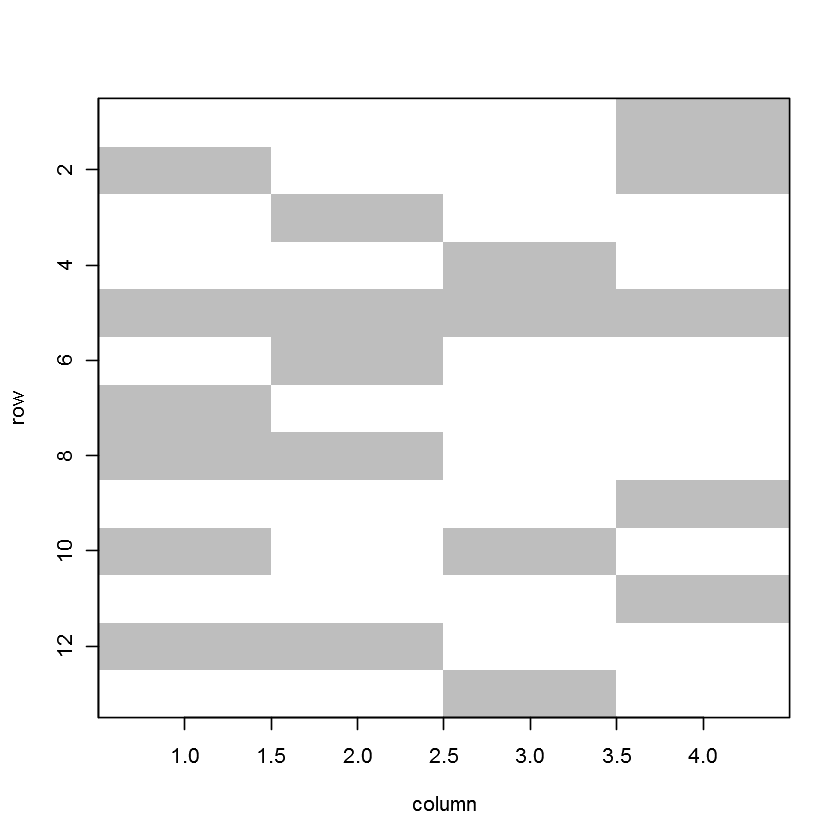

In [30]:
image(sparse_matrix)

### Using the MovieLens sparse matrix

Some of the tasks in this section require a long time to run. Be patient and drink your coffee.

In [31]:
url <- "http://files.grouplens.org/datasets/movielens/ml-20m.zip"
destfile <- "ml-20m.zip"
download.file(url, destfile, mode =  "wb")
unzip(destfile, list = T)
unzip(destfile)

Name,Length,Date
<chr>,<dbl>,<dttm>
ml-20m/,0,2016-10-17 10:12:00
ml-20m/genome-scores.csv,323544381,2016-10-17 09:41:00
ml-20m/genome-tags.csv,18103,2016-10-17 09:41:00
ml-20m/links.csv,570090,2016-10-17 09:50:00
ml-20m/movies.csv,1397542,2015-03-31 16:17:00
ml-20m/ratings.csv,533444411,2015-03-31 16:14:00
ml-20m/README.txt,10261,2016-10-17 10:21:00
ml-20m/tags.csv,16603996,2015-03-31 16:01:00


In [32]:
ratings <- read.csv("ml-20m/ratings.csv")

In [33]:
print(dim(ratings))
print(head(ratings))

[1] 20000263        4
  userId movieId rating  timestamp
1      1       2    3.5 1112486027
2      1      29    3.5 1112484676
3      1      32    3.5 1112484819
4      1      47    3.5 1112484727
5      1      50    3.5 1112484580
6      1     112    3.5 1094785740


In [34]:
names <- read.csv("ml-20m/movies.csv")
print(dim(names))
print(head(names))

[1] 27278     3
  movieId                              title
1       1                   Toy Story (1995)
2       2                     Jumanji (1995)
3       3            Grumpier Old Men (1995)
4       4           Waiting to Exhale (1995)
5       5 Father of the Bride Part II (1995)
6       6                        Heat (1995)
                                       genres
1 Adventure|Animation|Children|Comedy|Fantasy
2                  Adventure|Children|Fantasy
3                              Comedy|Romance
4                        Comedy|Drama|Romance
5                                      Comedy
6                       Action|Crime|Thriller


In [35]:
movie_data <- merge(ratings, names, by="movieId")
print(dim(movie_data))
print(head(movie_data))

[1] 20000263        6
  movieId userId rating  timestamp            title
1       1 124152    5.0  857214364 Toy Story (1995)
2       1  93599    4.5 1279077703 Toy Story (1995)
3       1 136201    2.0  891362920 Toy Story (1995)
4       1   8863    5.0  849625801 Toy Story (1995)
5       1   4903    4.0  947976864 Toy Story (1995)
6       1  28307    5.0  942604656 Toy Story (1995)
                                       genres
1 Adventure|Animation|Children|Comedy|Fantasy
2 Adventure|Animation|Children|Comedy|Fantasy
3 Adventure|Animation|Children|Comedy|Fantasy
4 Adventure|Animation|Children|Comedy|Fantasy
5 Adventure|Animation|Children|Comedy|Fantasy
6 Adventure|Animation|Children|Comedy|Fantasy


In [36]:
rm(ratings)

In [37]:
rm(names)

In [38]:
mean_ratings <- aggregate(movie_data$rating, list(movie_data$title), mean)
print(head(mean_ratings))

                                         Group.1        x
1                                     '71 (2014) 3.657143
2                             'burbs, The (1989) 3.067391
3        'Hellboy': The Seeds of Creation (2004) 3.028736
4 'Human' Factor, The (Human Factor, The) (1975) 2.250000
5                'Neath the Arizona Skies (1934) 2.318182
6                           'night Mother (1986) 3.449153


### Cleaning up

In [39]:
rm(movie_data)
rm(mean_ratings)

# Using Scoring and Classification

## Performing classification tasks

The `20_newsgroups.csv` file is a separate download when working with R. You can find it as a separate file with the source code for this book. When working with Python, you obtain access to the same data using the `sklearn.datasets` package.

In [41]:
dataset <- read.csv("./20_newsgroups.csv",
                 row.names = NULL, 
                 stringsAsFactors = FALSE)

In [42]:
dim(dataset)

[1] 11314     3

In [43]:
library(tm)

if (!("irlba" %in% rownames(installed.packages()))) {
    install.packages("irlba")
}

library(irlba)

if (!("Matrix" %in% rownames(installed.packages()))) {
    install.packages("Matrix")
}

library(Matrix)

Warning message:
"package 'irlba' was built under R version 3.5.3"

In [44]:
corpus <- VCorpus(VectorSource(dataset$text)) 
dtm <- DocumentTermMatrix(corpus,
           control = list(weighting=function(x) weightTfIdf(x, normalize=TRUE),
                          stopwords=stopwords("english"), 
                          removePunctuation=TRUE,
                          removeNumbers=TRUE,
                          tolower=TRUE,
                          wordLengths=c(4,Inf))
                          )

In [45]:
inspect(dtm)

<<DocumentTermMatrix (documents: 11314, terms: 92694)>>
Non-/sparse entries: 1105159/1047634757
Sparsity           : 100%
Maximal term length: 180
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
       Terms
Docs    article host        know like nntp     posting thanks   university will
  10069       0    0 0.000000000    0    0 0.000000000      0 0.0017425195    0
  10228       0    0 0.001061798    0    0 0.000688008      0 0.0008052788    0
  11216       0    0 0.000000000    0    0 0.000000000      0 0.0010115750    0
  11265       0    0 0.000000000    0    0 0.000000000      0 0.0000000000    0
  3782        0    0 0.000000000    0    0 0.000000000      0 0.0008435057    0
  4996        0    0 0.000000000    0    0 0.000000000      0 0.0027448224    0
  5663        0    0 0.000000000    0    0 0.000000000      0 0.0008264704    0
  6191        0    0 0.000000000    0    0 0.000000000      0 0.0000000000    0
  7998      

In [46]:
terms <- dtm$dimnames[[2]]

In [47]:
sparse_matrix <- sparseMatrix(i=dtm$i, j=dtm$j, x=dtm$v)
n_topics = 5
res <- irlba(sparse_matrix, n_topics)

In [48]:
topics <- res$v

In [49]:
dim(topics)

[1] 92694     5

In [50]:
for (topic in 1:n_topics) {
    print(paste("topic",topic,"| top words:",paste(terms[order(abs(topics[,topic]), decreasing=T)[1:10]], collapse=" ")))
}

[1] "topic 1 | top words: windows university thanks will know host nntp posting anyone please"
[1] "topic 2 | top words: cosmo angmaralfalfacom angmar benson alphalpha proline utexas csutexasedu gateway buedu"
[1] "topic 3 | top words: scsi windows card drive video sale controller thanks drivers driver"
[1] "topic 4 | top words: scsi windows drive controller window drives file petch hard grass"
[1] "topic 5 | top words: petch grass valley gvggvgtekcom chuck verse daily group scsi windows"


## Analyzing reviews from e-commerce


In [51]:
UCI_url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'

In [52]:
destfile <- "labelled_sentences.zip"
download.file(UCI_url, destfile, mode =  "wb")

In [53]:
unzip(destfile, list = T)
unzip(destfile)

Name,Length,Date
<chr>,<dbl>,<dttm>
sentiment labelled sentences/,0,2016-07-05 11:32:00
sentiment labelled sentences/.DS_Store,6148,2016-07-05 11:32:00
__MACOSX/,0,2016-07-05 11:39:00
__MACOSX/sentiment labelled sentences/,0,2016-07-05 11:39:00
__MACOSX/sentiment labelled sentences/._.DS_Store,212,2016-07-05 11:32:00
sentiment labelled sentences/amazon_cells_labelled.txt,58226,2016-07-05 11:30:00
sentiment labelled sentences/imdb_labelled.txt,85285,2015-02-14 16:11:00
__MACOSX/sentiment labelled sentences/._imdb_labelled.txt,212,2015-02-14 16:11:00
sentiment labelled sentences/readme.txt,1070,2015-05-30 17:29:00


In [54]:
dataset = read.delim('./sentiment labelled sentences/imdb_labelled.txt', sep="\t", 
                     quote=NULL, header=FALSE,
                     col.names=c('text','target'), as.is = TRUE)

In [55]:
corpus <- VCorpus(VectorSource(dataset$text)) 
dtm <- DocumentTermMatrix(corpus,
           control = list(weighting=function(x) weightTfIdf(x, normalize=TRUE),
                          stopwords=stopwords("english"), 
                          removePunctuation=TRUE,
                          removeNumbers=TRUE,
                          tolower=TRUE,
                          wordLengths=c(4,Inf))
                          )

Warning message in weightTfIdf(x, normalize = TRUE):
"empty document(s): 126 188 199 494 678 789"

In [56]:
inspect(dtm)

<<DocumentTermMatrix (documents: 1000, terms: 2864)>>
Non-/sparse entries: 6679/2857321
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
     Terms
Docs  acting awful even film funny good great just movie really
  105      0     0    0    0     0    0     0    0     0      0
  185      0     0    0    0     0    0     0    0     0      0
  346      0     0    0    0     0    0     0    0     0      0
  353      0     0    0    0     0    0     0    0     0      0
  405      0     0    0    0     0    0     0    0     0      0
  620      0     0    0    0     0    0     0    0     0      0
  677      0     0    0    0     0    0     0    0     0      0
  912      0     0    0    0     0    0     0    0     0      0
  93       0     0    0    0     0    0     0    0     0      0
  999      0     0    0    0     0    0     0    0     0      0


In [57]:
terms <- dtm$dimnames[[2]]
bow <- as.matrix(dtm)
target <- dataset$target

In [58]:
if (!("LiblineaR" %in% rownames(installed.packages()))) {
    install.packages("LiblineaR")
}

library(LiblineaR)

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [59]:
# Splitting the data frame into train and test sets
set.seed(0)
sample_size <- floor(0.67 * nrow(bow))
train_idx <- sample(seq_len(nrow(bow)), size = sample_size)

In [60]:
bow_train <- bow[train_idx, ]
target_train <- target[train_idx]

bow_test <- bow[-train_idx, ]
target_test <- target[-train_idx]

In [64]:
if (!require("LiblineaR")) install.packages("LiblineaR", repos='http://cran.us.r-project.org')
library(LiblineaR)

for (cost_value in c(1.0, 0.1, 0.01, 0.001)) {
    clf <- LiblineaR(bow_train, target_train, type=1, cost=cost_value)
    test_predictions <- predict(clf, bow_test)$predictions
    test_accuracy <- sum(test_predictions==target_test) / length(target_test)
    print(paste("Cost =",cost_value,"-> accuracy =", round(test_accuracy, 3)))
}

Loading required package: LiblineaR
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'LiblineaR'"

package 'LiblineaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\John\AppData\Local\Temp\RtmpUDWaYR\downloaded_packages


Warning message:
"package 'LiblineaR' was built under R version 3.5.2"

[1] "Cost = 1 -> accuracy = 0.721"
[1] "Cost = 0.1 -> accuracy = 0.733"
[1] "Cost = 0.01 -> accuracy = 0.721"
[1] "Cost = 0.001 -> accuracy = 0.645"


In [65]:
print(dataset$text[-train_idx][test_predictions!=target_test])

  [1] "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "                                                                                                                                                                                                               
  [2] "A bit predictable.  "                                                                                                                                                                                                                                                                                                             
  [3] "This short film certainly pulls no punches.  "                                                                                                                                                                                                                                                                                    
  [4] "Gra